<a href="https://colab.research.google.com/github/omrout07/Prodigy-InfoTech-Inrternship/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sample dataset created and saved: sample_accidents.csv
✅ File loaded successfully!
Shape: (10000, 11)
   Severity           Start_Time Weather_Condition  Visibility(mi)  \
0         4  2020-01-01 00:00:00              Rain        1.547114   
1         3  2020-01-01 01:00:00             Clear        3.379798   
2         2  2020-01-01 02:00:00              Rain        5.964347   
3         4  2020-01-01 03:00:00               Fog        5.159620   
4         4  2020-01-01 04:00:00              Snow        5.590708   

   Temperature(F)  Humidity(%)  Wind_Speed(mph)         City State  Start_Lat  \
0       47.407385    69.057358         4.839032      Chicago    NY  29.786038   
1       31.273507    64.613420         0.414564     New York    TX  40.779285   
2       29.103763    56.493101        25.599165  Los Angeles    NY  27.719864   
3       53.924005    72.401558         4.952908        Miami    CA  31.232040   
4       67.910799    31.394414        11.359031      Chicago    IL  30

/tmp/ipython-input-912167301.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


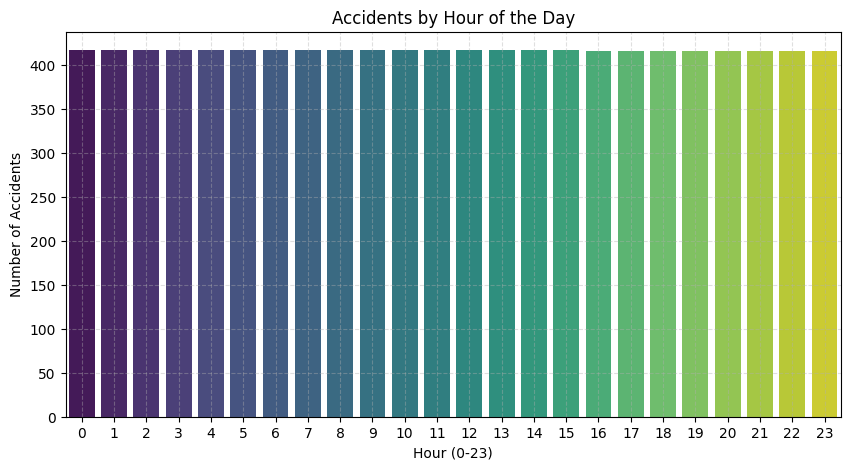

/tmp/ipython-input-912167301.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, order=order, palette='magma')


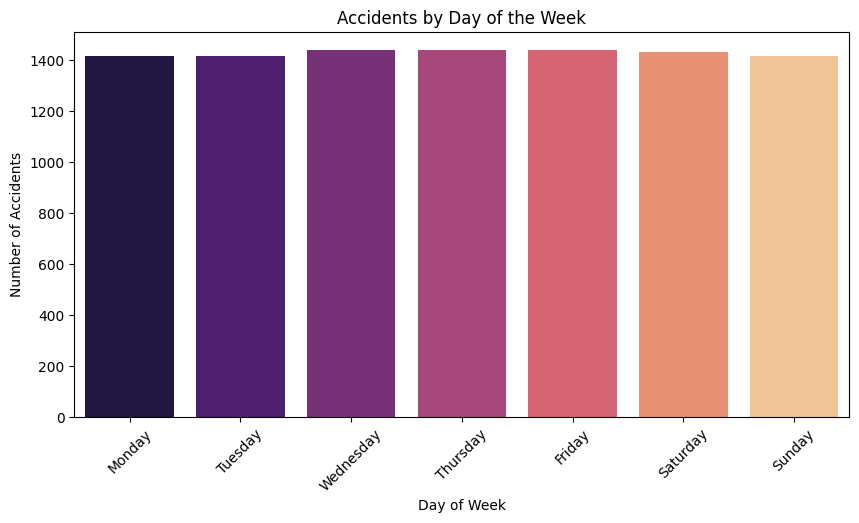

/tmp/ipython-input-912167301.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')


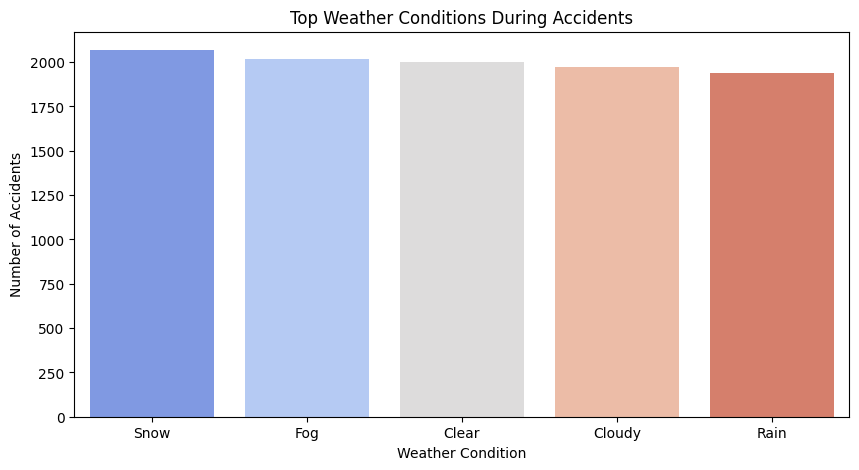

/tmp/ipython-input-912167301.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Temperature(F)', data=df, palette='Set2')


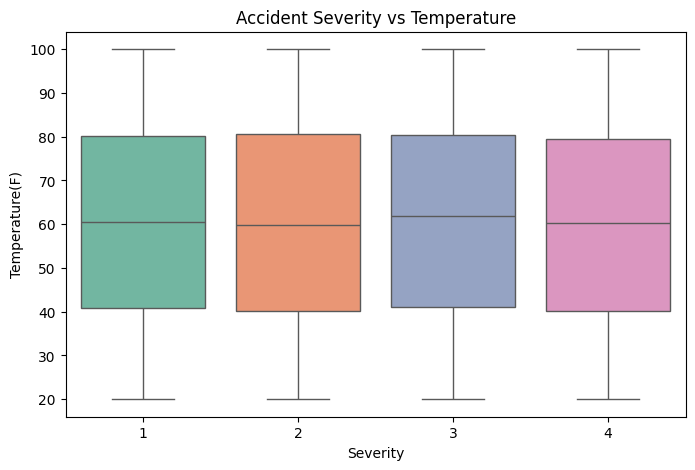

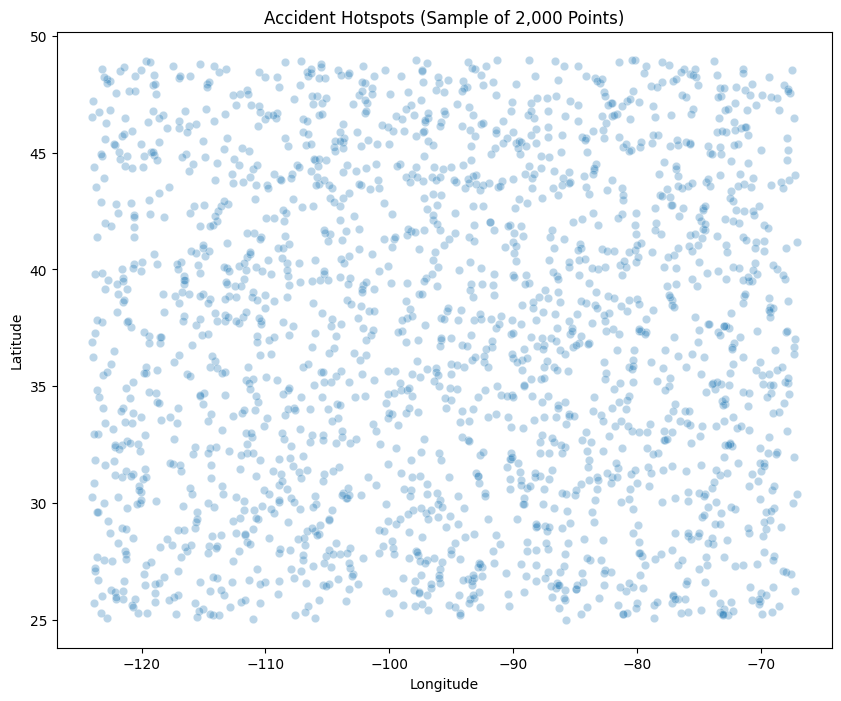

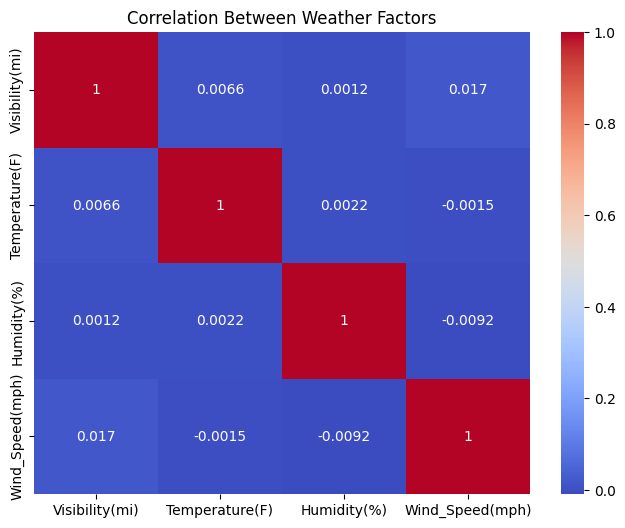

/tmp/ipython-input-912167301.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')


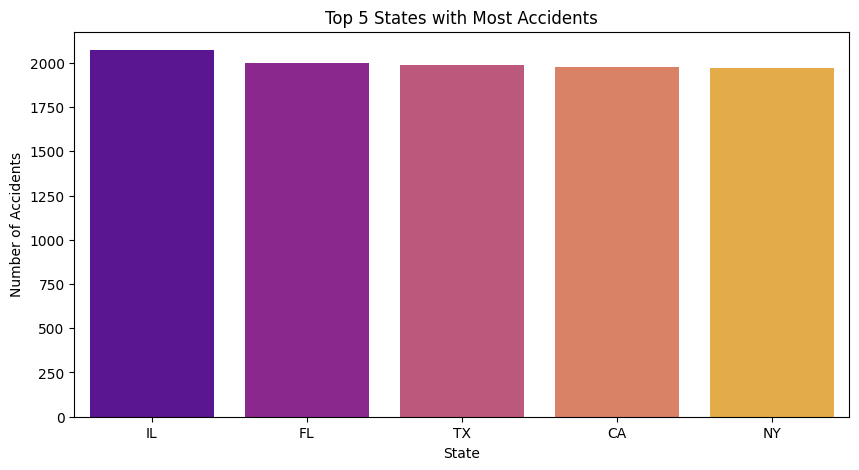


📊 KEY INSIGHTS (Sample Data):
🔹 Total accidents analyzed: 10000
🔹 Peak accident hours: 0
🔹 Most common weather condition: Snow
🔹 State with most accidents: IL
✅ Analysis Completed Successfully!


In [1]:
# ---------------------------------------------------------------
# PRODIGY INFOTECH INTERNSHIP - TASK 05
# Analyze traffic accident data (using SAMPLE dataset to avoid
# large Kaggle file issues in Colab).
# ---------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# ---------------------------------------------------------------
# STEP 1: Create a sample dataset (10,000 rows)
# ---------------------------------------------------------------
rows = 10000
data = {
    "Severity": np.random.randint(1, 5, rows),  # accident severity 1–4
    "Start_Time": [datetime(2020,1,1) + timedelta(hours=i) for i in range(rows)],
    "Weather_Condition": np.random.choice(["Clear", "Rain", "Snow", "Fog", "Cloudy"], rows),
    "Visibility(mi)": np.random.uniform(0.5, 10, rows),
    "Temperature(F)": np.random.uniform(20, 100, rows),
    "Humidity(%)": np.random.uniform(20, 100, rows),
    "Wind_Speed(mph)": np.random.uniform(0, 30, rows),
    "City": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Miami"], rows),
    "State": np.random.choice(["NY", "CA", "IL", "TX", "FL"], rows),
    "Start_Lat": np.random.uniform(25, 49, rows),   # random US latitude
    "Start_Lng": np.random.uniform(-124, -67, rows) # random US longitude
}

sample_df = pd.DataFrame(data)

# 💾 Save to CSV
filename = "sample_accidents.csv"
sample_df.to_csv(filename, index=False)

print("✅ Sample dataset created and saved:", filename)

# ---------------------------------------------------------------
# STEP 2: Load the dataset
# ---------------------------------------------------------------
df = pd.read_csv(filename)
print("✅ File loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# STEP 3: Feature Engineering
# ---------------------------------------------------------------
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# ---------------------------------------------------------------
# STEP 4: Visualizations
# ---------------------------------------------------------------

# 1️⃣ Accidents by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# 2️⃣ Accidents by Day of Week
plt.figure(figsize=(10,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='Day_of_Week', data=df, order=order, palette='magma')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Top Weather Conditions
plt.figure(figsize=(10,5))
top_weather = df['Weather_Condition'].value_counts().head(5)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')
plt.title('Top Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

# 4️⃣ Severity vs Temperature
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df, palette='Set2')
plt.title('Accident Severity vs Temperature')
plt.show()

# 5️⃣ Accident Hotspots (scatterplot)
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',
                data=df.sample(2000, random_state=42), alpha=0.3)
plt.title('Accident Hotspots (Sample of 2,000 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 6️⃣ Correlation Between Weather Factors
plt.figure(figsize=(8,6))
sns.heatmap(df[['Visibility(mi)', 'Temperature(F)', 'Humidity(%)',
                'Wind_Speed(mph)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Factors')
plt.show()

# 7️⃣ States with Highest Accident Count
plt.figure(figsize=(10,5))
top_states = df['State'].value_counts().head(5)
sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')
plt.title('Top 5 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

# ---------------------------------------------------------------
# STEP 5: Insights
# ---------------------------------------------------------------
print("\n📊 KEY INSIGHTS (Sample Data):")
print("🔹 Total accidents analyzed:", len(df))
print("🔹 Peak accident hours:", df['Hour'].value_counts().idxmax())
print("🔹 Most common weather condition:", df['Weather_Condition'].value_counts().idxmax())
print("🔹 State with most accidents:", df['State'].value_counts().idxmax())
print("✅ Analysis Completed Successfully!")